In [1]:
#!pip3 install pandas
import pandas as pd

import numpy as np
import re
from nltk.corpus import stopwords
import string

import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip3 install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 11.5 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=1f0ee7f64bb8497bed76975a6670cefed504070d654eb8b36e8820fde653123f
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [3]:
data_loc_1 = 'https://raw.githubusercontent.com/Nicocaputocai/tw-sent-eng-es/main/data/train_esp_final.csv'
df1 = pd.read_csv(data_loc_1, delimiter=';', skiprows=0, low_memory=False)

In [4]:
df1

,tweet,sentiment
0,"El capítulo 4 de #Vamosjuan, 'patagonia, es un...",1
1,Que yá afloje el calor! Bienvenido sea el aire...,1
2,@_uy Cuandooo nos vemoss,1
3,@Luis_MCMLXVII @magdysierra Están de joda en C...,-1
4,@RosadeLejos6 Este mamarracho es el q le dijo ...,-1
...,...,...
2156,"una vez un sabio dijo: \r\n""Regalame tu corazó...",1
2157,Sos lo más,1
2158,Sos lo más,1
2159,Sos lo mas,1


In [5]:
data_loc_2 = 'https://raw.githubusercontent.com/Nicocaputocai/tw-sent-eng-es/main/data/train_esp_6.csv'
df2 = pd.read_csv(data_loc_2, delimiter=';', skiprows=0, low_memory=False, encoding='utf8')

In [6]:
df2

,tweet,sentiment
0,@J Si diciendo esa boludez llegó a profe del ...,-1
1,"@DaroNieto Transparencia, jajaja. En lugar de ...",-1
2,El caso https://t.co/V3slDL9GTf,-1
3,@Soledad_Acunia @gcba Y por q no impulsan abri...,-1
4,@Ojo_Kritico tiene muchas mas posibilidades ...,-1
...,...,...
1222,ay lo ame,1
1223,amo jajaja,1
1224,jajaja ame,1
1225,amo mal,1


In [7]:
data_loc_3 = 'https://raw.githubusercontent.com/Nicocaputocai/tw-sent-eng-es/main/data/train_esp_7.csv'
df3 = pd.read_csv(data_loc_3, delimiter=';', skiprows=0, low_memory=False, encoding='utf8')

In [8]:
df3

,tweet,sentiment
0,🐶🏠 ¡Ayúdame a volver a casa! Mi tutor apreciar...,1
1,@UBA_Quito @amcquito Es que por donde lo veas ...,1
2,🪨 ¿Cómo es estudiar Ciencias Geológicas en Exa...,1
3,@jisung7u7 ERES UNA MANIPULADORA !???,-1
4,@ValeriaaaaaL Estas haciendo alguna materia de...,1
...,...,...
1921,@Karemjtv me machacaban demasiado con la disci...,1
1922,Aveces amo mucho mi corazón de pollo porque le...,-1
1923,Felicitaciones Dr. El matrimonio es lo más lin...,1
1924,"Que susto, me dejaste con el corazón en la boca",-1


In [9]:
df_comp = [df1, df2,df3]

In [10]:
result = pd.concat(df_comp,axis=0) # similar a pd.concat(frames,axis=0)
result

,tweet,sentiment
0,"El capítulo 4 de #Vamosjuan, 'patagonia, es un...",1
1,Que yá afloje el calor! Bienvenido sea el aire...,1
2,@_uy Cuandooo nos vemoss,1
3,@Luis_MCMLXVII @magdysierra Están de joda en C...,-1
4,@RosadeLejos6 Este mamarracho es el q le dijo ...,-1
...,...,...
1921,@Karemjtv me machacaban demasiado con la disci...,1
1922,Aveces amo mucho mi corazón de pollo porque le...,-1
1923,Felicitaciones Dr. El matrimonio es lo más lin...,1
1924,"Que susto, me dejaste con el corazón en la boca",-1


In [11]:
df = result
df.head()

,tweet,sentiment
0,"El capítulo 4 de #Vamosjuan, 'patagonia, es un...",1
1,Que yá afloje el calor! Bienvenido sea el aire...,1
2,@_uy Cuandooo nos vemoss,1
3,@Luis_MCMLXVII @magdysierra Están de joda en C...,-1
4,@RosadeLejos6 Este mamarracho es el q le dijo ...,-1


In [12]:
df_c = df.drop(df.loc[df.sentiment==0,:].index)

In [13]:
df_c = df_c.drop(df.loc[df.sentiment==-11,:].index)

In [14]:
df_c

,tweet,sentiment
0,"El capítulo 4 de #Vamosjuan, 'patagonia, es un...",1
1,Que yá afloje el calor! Bienvenido sea el aire...,1
2,@_uy Cuandooo nos vemoss,1
3,@Luis_MCMLXVII @magdysierra Están de joda en C...,-1
4,@RosadeLejos6 Este mamarracho es el q le dijo ...,-1
...,...,...
1921,@Karemjtv me machacaban demasiado con la disci...,1
1922,Aveces amo mucho mi corazón de pollo porque le...,-1
1923,Felicitaciones Dr. El matrimonio es lo más lin...,1
1924,"Que susto, me dejaste con el corazón en la boca",-1


In [15]:
df_c.sentiment= df_c.sentiment.replace([1,-1], ['POS','NEG'])

In [16]:
df_c

,tweet,sentiment
0,"El capítulo 4 de #Vamosjuan, 'patagonia, es un...",POS
1,Que yá afloje el calor! Bienvenido sea el aire...,POS
2,@_uy Cuandooo nos vemoss,POS
3,@Luis_MCMLXVII @magdysierra Están de joda en C...,NEG
4,@RosadeLejos6 Este mamarracho es el q le dijo ...,NEG
...,...,...
1921,@Karemjtv me machacaban demasiado con la disci...,POS
1922,Aveces amo mucho mi corazón de pollo porque le...,NEG
1923,Felicitaciones Dr. El matrimonio es lo más lin...,POS
1924,"Que susto, me dejaste con el corazón en la boca",NEG


In [17]:
columns = ['tweet', 'sentiment']

df_c = shuffle(df_c[columns])
df_c = df_c.dropna(subset=['tweet'])


In [18]:
sentiment_count = df_c.sentiment.value_counts()

In [19]:
sentiment_count1 = df1.sentiment.value_counts()

In [20]:
sentiment_count2 = df2.sentiment.value_counts()

In [21]:
sentiment_count3 = df3.sentiment.value_counts()

In [22]:
display('df:',sentiment_count, 'nulls:', df.sentiment.isnull().sum())

'df:'

POS    2926
NEG    2386
Name: sentiment, dtype: int64

'nulls:'

0

In [23]:
display('df1:',sentiment_count1, 'nulls:', df2.sentiment.isnull().sum())

'df1:'

 1    1144
-1    1017
Name: sentiment, dtype: int64

'nulls:'

0

In [24]:
display('df2:',sentiment_count2, 'nulls:', df2.sentiment.isnull().sum())

'df2:'

-1    614
 1    613
Name: sentiment, dtype: int64

'nulls:'

0

In [25]:
display('df3:',sentiment_count3, 'nulls:', df2.sentiment.isnull().sum())

'df3:'

 1     1169
-1      756
-11       1
Name: sentiment, dtype: int64

'nulls:'

0

In [26]:
display('df:',df_c.sentiment.value_counts(), 'nulls:', df_c.sentiment.isnull().sum())

'df:'

POS    2926
NEG    2386
Name: sentiment, dtype: int64

'nulls:'

0

In [27]:
import emoji
import re

extra_args = {
    "vinai/bertweet-base":  {
        "user_token": "@USER",
        "url_token": "HTTPURL",
    }
}



special_tokens = ["", "", "hashtag", "emoji"]


user_regex = re.compile(r"@[a-zA-Z0-9_]{0,15}")
url_regex = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
)

hashtag_regex = re.compile(r'\B#(\w*[a-zA-Z]+\w*)')
start_of_camel = re.compile(r'([A-Z]+)')

def camel_to_human(s, lower=True):
    """
    Converts camel case to 'human' case

    Arguments:
    ----------

    lower: bool (default: False)
        Convert output to lower
    """

    ret = start_of_camel.sub(r' \1', s).strip()

    if lower:
        ret = ret.lower()

    return ret

emoji_regex = re.compile(r"\|([^\|]+)\|")

def convert_emoji_to_text(x, emoji_wrapper="[EMOJI]"):
    """
    """
    return f" {emoji_wrapper} " + " ".join(x.groups()[0].split("_")) + f" {emoji_wrapper} "


replacements = {
    "~": None,
    "£": None,
    "¥": None,
    "¨": '"',
    "©": None,
    "«": '"',
    "°": None,
    "´": None,
    "¶": None,
    "·": None,
    "º": None,
    "»": '"',
    "×": None,
    "ا": None,
    "–": None,
    "—": None,
    "‘": None,
    "’": None,
    "“": '"',
    "”": '"',
    "•": None,
    "…": None,
    "‼": "!",
    "€": "$",
    "™": None,
    "●": None,
    "☠": None,
    "☹": None,
    "☺": None,
    "☻": "😃",
    "♀": None,
    "♂": None,
    "♡": "❤️",
    "♥": "❤️",
    "⚰": None,
    "⛱": None,
    "⛹": None,
    "✈": None,
    "✓": None,
    "❤": None,
    "ー": None,
    "🕯": None,
    "🛰": None,
}

laughter_conf = {
    "es": {
        "regex": re.compile("[ja][ja]+aj[ja]+"),
        "replacement": "jaja",
    },
    "en": {
        "regex": re.compile("[ha][ha]+ah[ha]+"),
        "replacement": "haha",
    }
}



def preprocess_tweet(
    text, lang="es", user_token="@usuario", url_token="url", preprocess_hashtags=True, hashtag_token=None,
    demoji=True, shorten=3, normalize_laughter=True, emoji_wrapper="emoji"):
    """
    Basic preprocessing

    Arguments:
    ---------

    text: str
        Text to preprocess

    lang: str (default 'es')
        Language used in the preprocessing. This is used for the demoji functionality and laughter preprocessing

    user_token: str (default "[USER]")
        Token used to replace user handles

    url_token: str (default "[URL]")
        Token used to replace urls

    preprocess_hashtags: boolean (default True)
        If true, applies preprocessing to hashtag, trying to split camel cases

    hashtag_token: str (default None)
        If preprocess_hashtags is True, adds hashtag_token before the preprocessed content of the hashtag

    shorten: int (default: 3)
        If not none, all occurrences of shorten or more characters are cut to this number

    demoji: boolean (default True)
        If true, converts emoji to text representations using `emoji` library, and wraps this with "[EMOJI]" strings

    normalize_laughter: boolean (default True)
        Normalizes laughters. Uses differSent regular expressions depending on the lang argument.
    """
    if lang == "en" and user_token == "@usuario":
        """
        If it is english and we didn't set any defaults, we set the vinai/bertweet-base defaults
        """
        user_token = "@USER"
        url_token = "HTTPURL"


    ret = ""
    for char in text:
        if char in replacements:
            replacement = replacements[char]
            if replacement:
                ret += replacement
        else:
            ret += char
    text = ret

    text = user_regex.sub(user_token, text)
    text = url_regex.sub(url_token, text)

    if shorten:
        repeated_regex = re.compile(r"(.)"+ r"\1" * (shorten-1) + "+")
        text = repeated_regex.sub(r"\1"*shorten, text)

    if demoji:
        text = emoji.demojize(text, language=lang, delimiters=("|", "|"))
        text = emoji_regex.sub(
            lambda x: convert_emoji_to_text(x, emoji_wrapper=emoji_wrapper),
            text
        )

    if normalize_laughter:
        laughter_regex = laughter_conf[lang]["regex"]
        replacement = laughter_conf[lang]["replacement"]

        text = laughter_regex.sub(
            replacement,
            text
        )

    def process_hashtags(x):
        """
        Hashtag preprocessing function

        Take first group and decamelize
        """


        text = x.groups()[0]

        text = camel_to_human(text)

        if hashtag_token:
            text = hashtag_token + " " + text

        return text

    if preprocess_hashtags:
        text = hashtag_regex.sub(
            process_hashtags,
            text
        )

    return text.strip()

In [28]:
def strip_all_entities_es(text): 
    #text = re.sub(r"(?:\RT?)\S+", "", text) #removes retweets
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    #text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2



In [29]:
def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [30]:
texts_new_train = []
for t in df_c.tweet:
    texts_new_train.append(camel_to_human(preprocess_tweet(remove_mult_spaces(t))))
    
df_c['content_clean'] = texts_new_train

In [31]:
df_c

,tweet,sentiment,content_clean
508,"""Las Malvinas son Argentinas""",POS,""" las malvinas son argentinas"""
131,YO SIEMPRE PIENSO EN LA SEÑORA QUE HIZO CEVICH...,POS,yo siempre pienso en la señ ora que hiz...
1172,@diegocsz Malvinas? \r\nSi Argentina tuviera u...,NEG,@usuario malvinas? si argentina tuviera un ...
254,"Lo dije, estamos a un paso del previaje! Las p...",NEG,"lo dije, estamos a un paso del previaje! las ..."
832,"@crisrodri00 Y bueno, no soy de Caba, prefiero...",POS,"@usuario y bueno, no soy de caba, prefiero a..."
...,...,...,...
1799,"Me sumo a esta idea, sin hijos y reutilizando ...",POS,"me sumo a esta idea, sin hijos y reutilizando ..."
1894,@FbiMi6 Sos in señor que literalmente me dobla...,NEG,@usuario sos in señor que literalmente me dob...
1561,Hablemos qué es impresionante y es una genia t...,POS,hablemos qué es impresionante y es una genia t...
639,Yo me podría de apodo Precios Cuidados https:/...,POS,yo me podría de apodo precios cuidados url


In [32]:
df_c.head(50)

,tweet,sentiment,content_clean
508,"""Las Malvinas son Argentinas""",POS,""" las malvinas son argentinas"""
131,YO SIEMPRE PIENSO EN LA SEÑORA QUE HIZO CEVICH...,POS,yo siempre pienso en la señ ora que hiz...
1172,@diegocsz Malvinas? \r\nSi Argentina tuviera u...,NEG,@usuario malvinas? si argentina tuviera un ...
254,"Lo dije, estamos a un paso del previaje! Las p...",NEG,"lo dije, estamos a un paso del previaje! las ..."
832,"@crisrodri00 Y bueno, no soy de Caba, prefiero...",POS,"@usuario y bueno, no soy de caba, prefiero a..."
870,@ chiquito @EOS77D fue el responsable del su...,NEG,@usuario chiquito @usuario fue el responsable ...
178,@AldanaBoragnio @estebanrafele Yo después de l...,POS,@usuario @usuario yo después de la experienci...
202,#verano2022 #carloscasaresbeach. Inmejorable...,NEG,verano2022 carloscasaresbeach. inmejorables e...
207,@madorni @BlancaDios1 Ese previaje mo presenta...,NEG,@usuario @usuario ese previaje mo presentan c...
1391,"Esta semana inviten hacer de todo,que me voy p...",POS,"esta semana inviten hacer de todo,que me voy p..."


In [33]:
X,y =df_c['content_clean'], df_c['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# build a pipeline 

stopwords = [word for word in stopwords.words('spanish')]

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, sublinear_tf=True)),
                     ('chi', SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC(C=1.0, penalty='l2',max_iter=3000, dual=False))
                    ])

pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x7fb59fc21050>)),
                ('clf', LinearSVC(dual=False, max_iter=3000))])>

In [35]:
# fit pipline to training data

model = pipeline.fit(X_train, y_train)

model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x7fb59fc21050>)),
                ('clf', LinearSVC(dual=False, max_iter=3000))])>

In [36]:
calibrated_pipeline = CalibratedClassifierCV(pipeline)
calibrated_pipeline.get_params

<bound method BaseEstimator.get_params of CalibratedClassifierCV(base_estimator=Pipeline(steps=[('vect',
                                                       TfidfVectorizer(ngram_range=(1,
                                                                                    2),
                                                                       stop_words=['de',
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
        

In [37]:
model_2 = calibrated_pipeline.fit(X_train, y_train)

In [38]:
print(f"TRAINING DATA: {X_train.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 4249
TESTING DATA: 1063


In [39]:
print('Model 1 accuracy score: '+ str(model.score(X_test, y_test)))

Model 1 accuracy score: 0.7563499529633114


In [40]:
print('Model 2 accuracy score: '+ str(model_2.score(X_test, y_test)))

Model 2 accuracy score: 0.7478833490122295


In [41]:
y_pred=model.predict(X_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


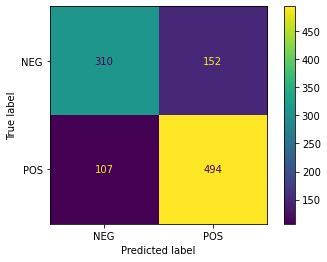

In [42]:
plot_confusion_matrix(model, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


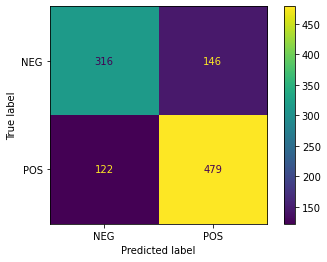

In [43]:
plot_confusion_matrix(model_2, X_test, y_test)

In [44]:
model.predict((['Es pesado el juego, pero está buenísimo', 'me dejaste con el corazón en la boca']))

array(['POS', 'NEG'], dtype=object)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         NEG       0.74      0.67      0.71       462
         POS       0.76      0.82      0.79       601

    accuracy                           0.76      1063
   macro avg       0.75      0.75      0.75      1063
weighted avg       0.76      0.76      0.75      1063



In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='POS')
roc_auc = metrics.auc(fpr, tpr)

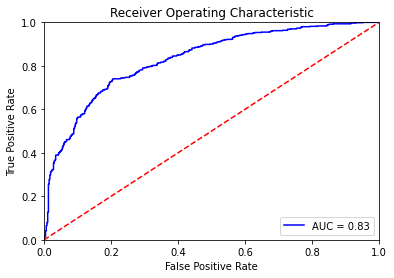

In [47]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
import joblib 

joblib.dump(model, 'sentiment-model-esp.pkl')

['sentiment-model-esp.pkl']

In [49]:
df_c.to_csv("train_esp_final.csv",sep=';')

In [50]:
from google.colab import files

In [51]:
#files.download("train_esp_final.csv")

In [58]:
#files.download("sentiment-model-esp.pkl")

In [53]:
fig_count = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

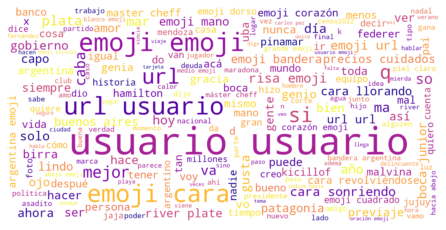

In [54]:
# Grafico wordcloud

# Read the whole text.
allWords = ' '.join( [twts for twts in df_c['content_clean']] )

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,background_color='white',colormap='plasma',width=1600, height=800).generate(allWords)

fig_wordcloud = plt.figure()
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

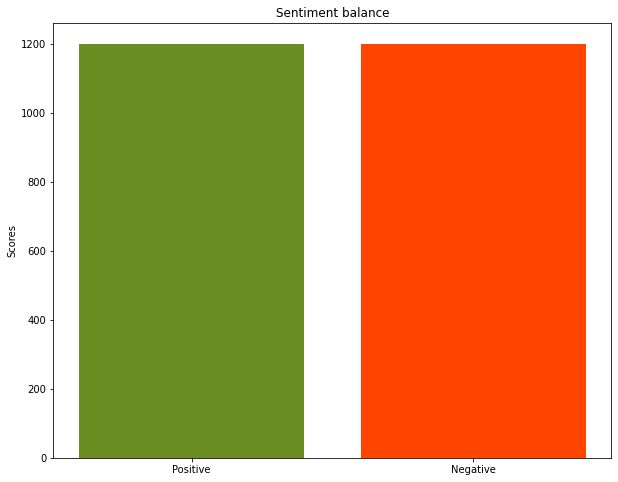

In [55]:
import numpy as np
import matplotlib.pyplot as plt

sentiment = df_c.sentiment
ind = np.arange(2) # crea una lista con numeros entre 0 y 4, las posiciones en x.
width = 1200 # ancho de las barras
fig = plt.figure(figsize=(10,8)); ax = plt.axes()
ax.bar(sentiment, width,color=['olivedrab', 'orangered'])
ax.set_ylabel('Scores'); ax.set_title('Sentiment balance')
ax.set_xticks(ind); ax.set_xticklabels(['Positive', 'Negative'])
plt.show()

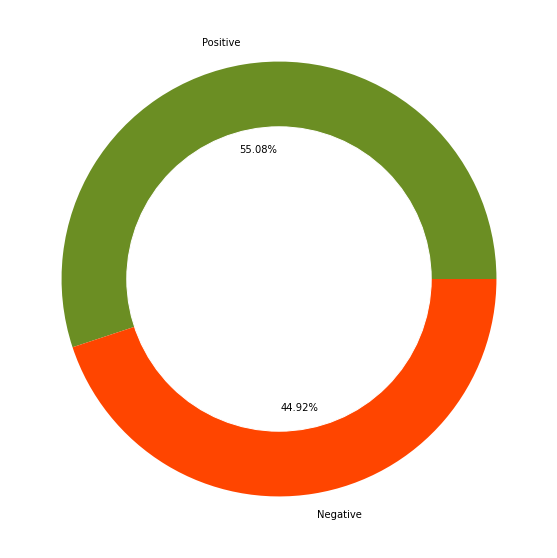

In [56]:
from matplotlib import pyplot as plt
import numpy as np

menMeans = (df_c.sentiment.value_counts()) # serie de numeros
groups = ['Positive', 'Negative'] # labels para cada numero

fig = plt.figure(figsize=(10,10)); ax = plt.axes()
"""
ax.set_title('Sentiment balance')
ax.pie(menMeans, labels = groups ,autopct='%1.2f%%')
plt.show()
"""
plt.pie(menMeans,labels=groups, colors=['olivedrab', 'orangered'],autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

###Probando otro modelo "https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5" No pude hacer funcionar los scores

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('spanish') + ['pero'] + ['usuario'] + ['emoji']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(df_c['content_clean'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: revolviéndose risa, cara revolviéndose, cara revolviéndose risa
Topic #1: cara llorando, cara llorando risa, llorando risa
Topic #2: cara sonriendo, sonriendo ojos, cara sonriendo ojos



In [ ]:
model_3 = pipe.fit(X_train, y_train)

model_3.get_params

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


<bound method Pipeline.get_params of Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(2, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('nmf', NMF(n_components=3))])>

In [ ]:
W = model_3.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


### Probando otro ejemplo "https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/"

In [ ]:
df_train=pd.DataFrame(X_train)
df_train

,content_clean
2,el caso url
1021,se entiende que la cuota es fijada dependiendo...
258,@usuario los tienen hoteles en santa cruz. l...
257,@usuario @usuario no sé por cuales de las tan...
1363,@usuario @usuario @usuario he dicho igual no...
...,...
1261,@usuario @usuario hola vanessa recuerda la i...
1599,"@usuario pero que genia, andamos igual"
414,@usuario en mar del plata esta divino... hac...
1527,covid19 vacuna covid19 vacunate pba tercera ol...


In [ ]:
df_train2=pd.DataFrame(y_train)

df_train=pd.concat([df_train,df_train2],axis=1)

In [ ]:
df_train.head()

,content_clean,sentiment
2,el caso url,NEG
1021,se entiende que la cuota es fijada dependiendo...,POS
258,@usuario los tienen hoteles en santa cruz. l...,POS
257,@usuario @usuario no sé por cuales de las tan...,NEG
1363,@usuario @usuario @usuario he dicho igual no...,NEG


In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('spanish'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
generate_N_grams("El sol sale por el oeste",2)

Sentence after removing stopwords: ['El', 'sol', 'sale', 'oeste']


['El sol', 'sol sale', 'sale oeste']

In [ ]:
df_test=pd.DataFrame(X_test)
df_test

,content_clean
323,@usuario master cheff?/ jaja
1865,quiero tener un amor):
1781,hoy me puse a ver mi pc y las de juyeon son lo...
73,emoji círculo rojo grande emoji problemas que...
139,emoji chincheta redonda emoji nacionales polít...
...,...
381,emoji círculo rojo grande emoji ahora en tiem...
339,"sin klever, master cheff y todos los partic..."
885,que vergüenza que la sociedad permita que el d...
1199,la carrera del nuevo emoji teclas 9 emoji de...


In [ ]:
df_test2=pd.DataFrame(y_test)

df_test=pd.concat([df_test,df_test2],axis=1)

In [ ]:
df_test.head()

,content_clean,sentiment
323,@usuario master cheff?/ jaja,POS
1865,quiero tener un amor):,POS
1781,hoy me puse a ver mi pc y las de juyeon son lo...,POS
73,emoji círculo rojo grande emoji problemas que...,NEG
139,emoji chincheta redonda emoji nacionales polít...,NEG


In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('spanish'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
generate_N_grams("El sol sale por el este",2)

Sentence after removing stopwords: ['El', 'sol', 'sale']


['El sol', 'sol sale']

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="NEG"].content_clean:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="POS"].content_clean:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [ ]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [ ]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)

In [ ]:
for text in df_train[df_train.sentiment=="POS"].content_clean:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [ ]:
for text in df_train[df_train.sentiment=="NEG"].content_clean:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [ ]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [ ]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)

###Otro intento "https://github.com/motiurinfo/sentiment_classification/blob/master/sentimentAnalysis.py"

In [ ]:
def bigram_process(data):
	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(ngram_range=(1,2))
	vectorizer = vectorizer.fit(data)
	return vectorizer

In [ ]:
bi_vectorizer = bigram_process(X_train)
print ("Fitting the bigram model")
Xtrain_bi = bi_vectorizer.transform(X_train)
print ("After fitting ")

Fitting the bigram model
After fitting 


In [ ]:
Xtest_bi = bi_vectorizer.transform(X_test)
print ("After fitting ")

After fitting 


In [ ]:
def extra_tree_classifier(X_train, y_train, X_test):
	from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
	from sklearn.ensemble import BaggingClassifier
	from sklearn.tree import DecisionTreeClassifier

	clf = ExtraTreesClassifier()
	print ("Extra Tree Fitting")
	clf.fit(X_train, y_train)
	print ("Extra Tree Predicting")
	Ytest = clf.predict(X_test)
	return Ytest

In [ ]:
def random_forest_classifier(X_train, y_train, X_test):
	from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
	from sklearn.ensemble import BaggingClassifier
	from sklearn.tree import DecisionTreeClassifier

	clf = RandomForestClassifier()

	print ("Random Forest Fitting")
	clf.fit(X_train, y_train)
	print ("Random Forest Predicting")
	Ytest = clf.predict(X_test)

	return y_test

In [ ]:
def accuracy(y_train, y_test):
	assert (len(y_train)==len(y_test))
	num =  sum([1 for i, word in enumerate(y_train) if y_test[i]==word])
	n = len(y_train)  
	return (num*100)/n

In [ ]:
Y_bi = extra_tree_classifier(Xtrain_bi, y_train, Xtest_bi)
print ("Done with  Extra Tree")

Extra Tree Fitting
Extra Tree Predicting
Done with  Extra Tree


In [ ]:
Y_bi = random_forest_classifier(Xtrain_bi, y_train, Xtrain_bi)
print ("Done with  Random Forest")

Random Forest Fitting
Random Forest Predicting
Done with  Random Forest


In [ ]:
##print ("Accuracy for the Bigram Model is ", accuracy(y_train, Y_bi))